# **Regresión Univariada con Python**

La idea es tomar un conjunto de datos (*mtcars*) en un dataframe y realizar una regresion lineal con sus supuestos, repasando tambien nociones de correlacion.

Los datos fueron extraídos de la Motor Trend US magazine (1974), y contiene datos de consumo de combustible, diseño y desempeño de 32 automóviles (modelos 1973-74).

### Descripción del dataset `mtcars`

Este dataset contiene información de 32 modelos de automóviles, con 12 columnas numéricas y categóricas:

| Variable      | Descripción                                                  |
|---------------|--------------------------------------------------------------|
| manufacturer  | Nombre del modelo y fabricante del auto                      |
| mpg           | Millas por galón (eficiencia de combustible)                |
| cyl           | Número de cilindros                                          |
| disp          | Cilindrada del motor (en pulgadas cúbicas)                  |
| hp            | Caballos de fuerza                                           |
| drat          | Relación de eje trasero (rear axle ratio)                   |
| wt            | Peso del coche (en miles de libras)                         |
| qsec          | Tiempo en recorrer 1/4 de milla (segundos)                  |
| vs            | Tipo de motor (0 = V, 1 = en línea)                          |
| am            | Tipo de transmisión (0 = automática, 1 = manual)            |
| gear          | Número de marchas                                            |
| carb          | Número de carburadores                                       |

> Este dataset es útil para análisis exploratorios, regresión lineal y clasificación básica.
master/mtcars.csv)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import shapiro
import pylab

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as smf
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [22]:
# Defino directorio de trabajo
import os
path = os.chdir(r'C:\PROYECTOS\GitHub\Diplomatura_UNC\practica2')
os.getcwd()

'C:\\PROYECTOS\\GitHub\\Diplomatura_UNC\\practica2'

In [23]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/mtcars.csv'

df = pd.read_csv(url)
print(df.shape)
df.head()

(32, 12)


,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [24]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [4]:
print(df['mpg'].mean())
print(df['mpg'].quantile(0.25))

20.090625000000003
15.425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  32 non-null     object 
 1   mpg           32 non-null     float64
 2   cyl           32 non-null     int64  
 3   disp          32 non-null     float64
 4   hp            32 non-null     int64  
 5   drat          32 non-null     float64
 6   wt            32 non-null     float64
 7   qsec          32 non-null     float64
 8   vs            32 non-null     int64  
 9   am            32 non-null     int64  
 10  gear          32 non-null     int64  
 11  carb          32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
df.columns

Index(['manufacturer', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [25]:
# Restringimos solo a las siguientes variables numericas:

numeric_cols = ['mpg','disp','hp','drat','wt','qsec']
data = df[numeric_cols]
data.head(10)

,mpg,disp,hp,drat,wt,qsec
0,21.0,160.0,110,3.90,2.620,16.46
1,21.0,160.0,110,3.90,2.875,17.02
2,22.8,108.0,93,3.85,2.320,18.61
3,21.4,258.0,110,3.08,3.215,19.44
4,18.7,360.0,175,3.15,3.440,17.02
5,18.1,225.0,105,2.76,3.460,20.22
6,14.3,360.0,245,3.21,3.570,15.84
7,24.4,146.7,62,3.69,3.190,20.00
8,22.8,140.8,95,3.92,3.150,22.90
9,19.2,167.6,123,3.92,3.440,18.30


### Visualización

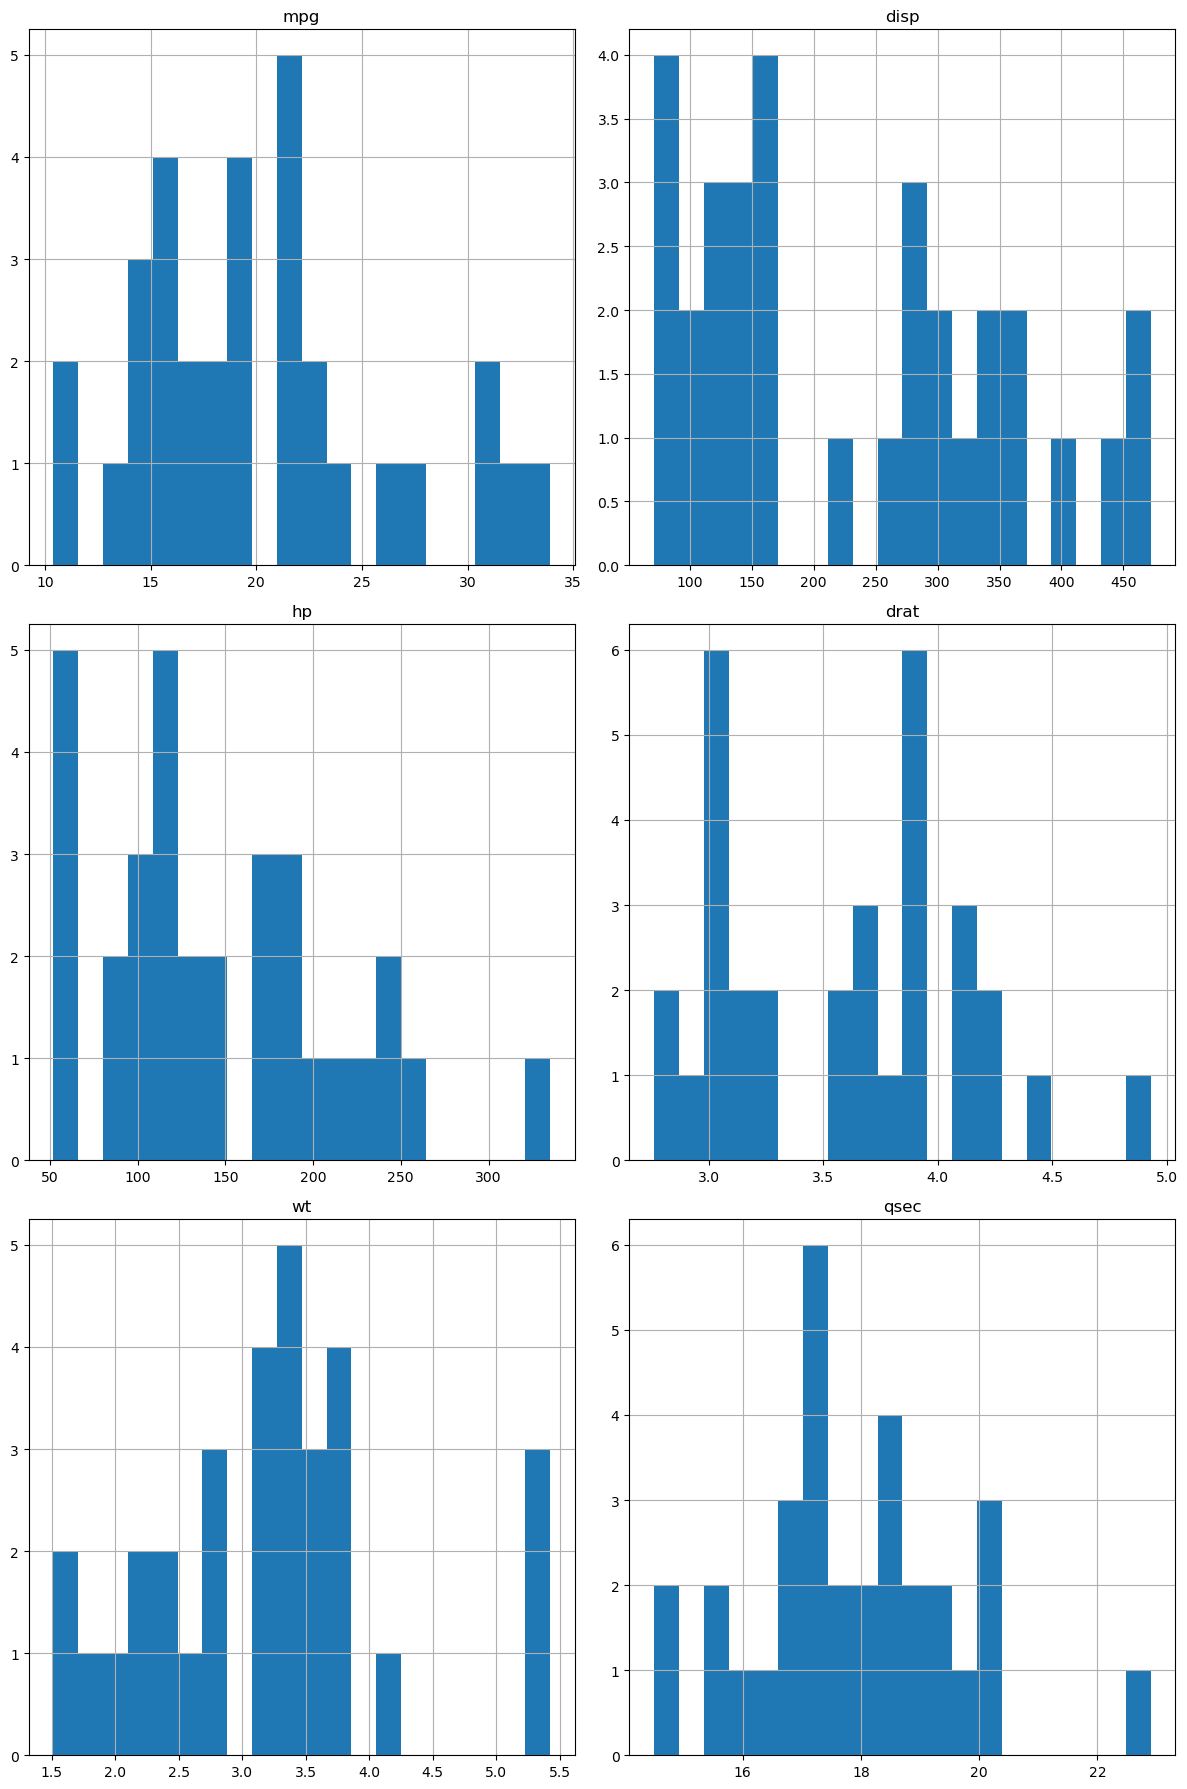

In [26]:
# Distribucion de los valores en histograma
data.hist(bins=20, figsize=(12,18))
plt.tight_layout() # Ajusta el diseño para evitar solapamientos
#plt.savefig('histogramas_mtcars.png') # Guarda la figura

plt.show()

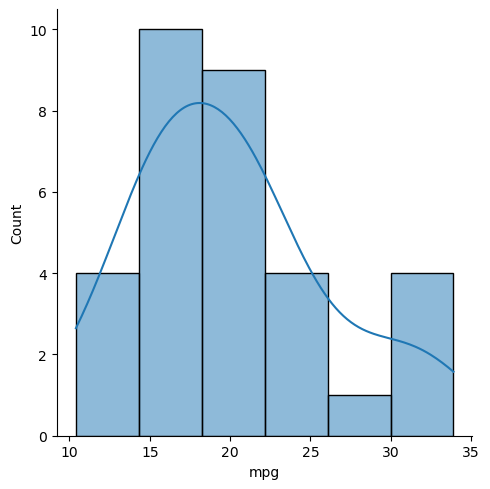

In [20]:
fig = sns.displot(data['mpg'], kde=True)
#fig.savefig('distribucion_mpg.png')
plt.show()

 La barra más alta indica que la mayoría de los autos en tu dataset tienen entre aproximadamente 15 y 20 mpg.
 La **curva de densidad** sugiere una distribución ligeramente asimétrica hacia la derecha, con la mayoría de los valores concentrados en el rango medio.

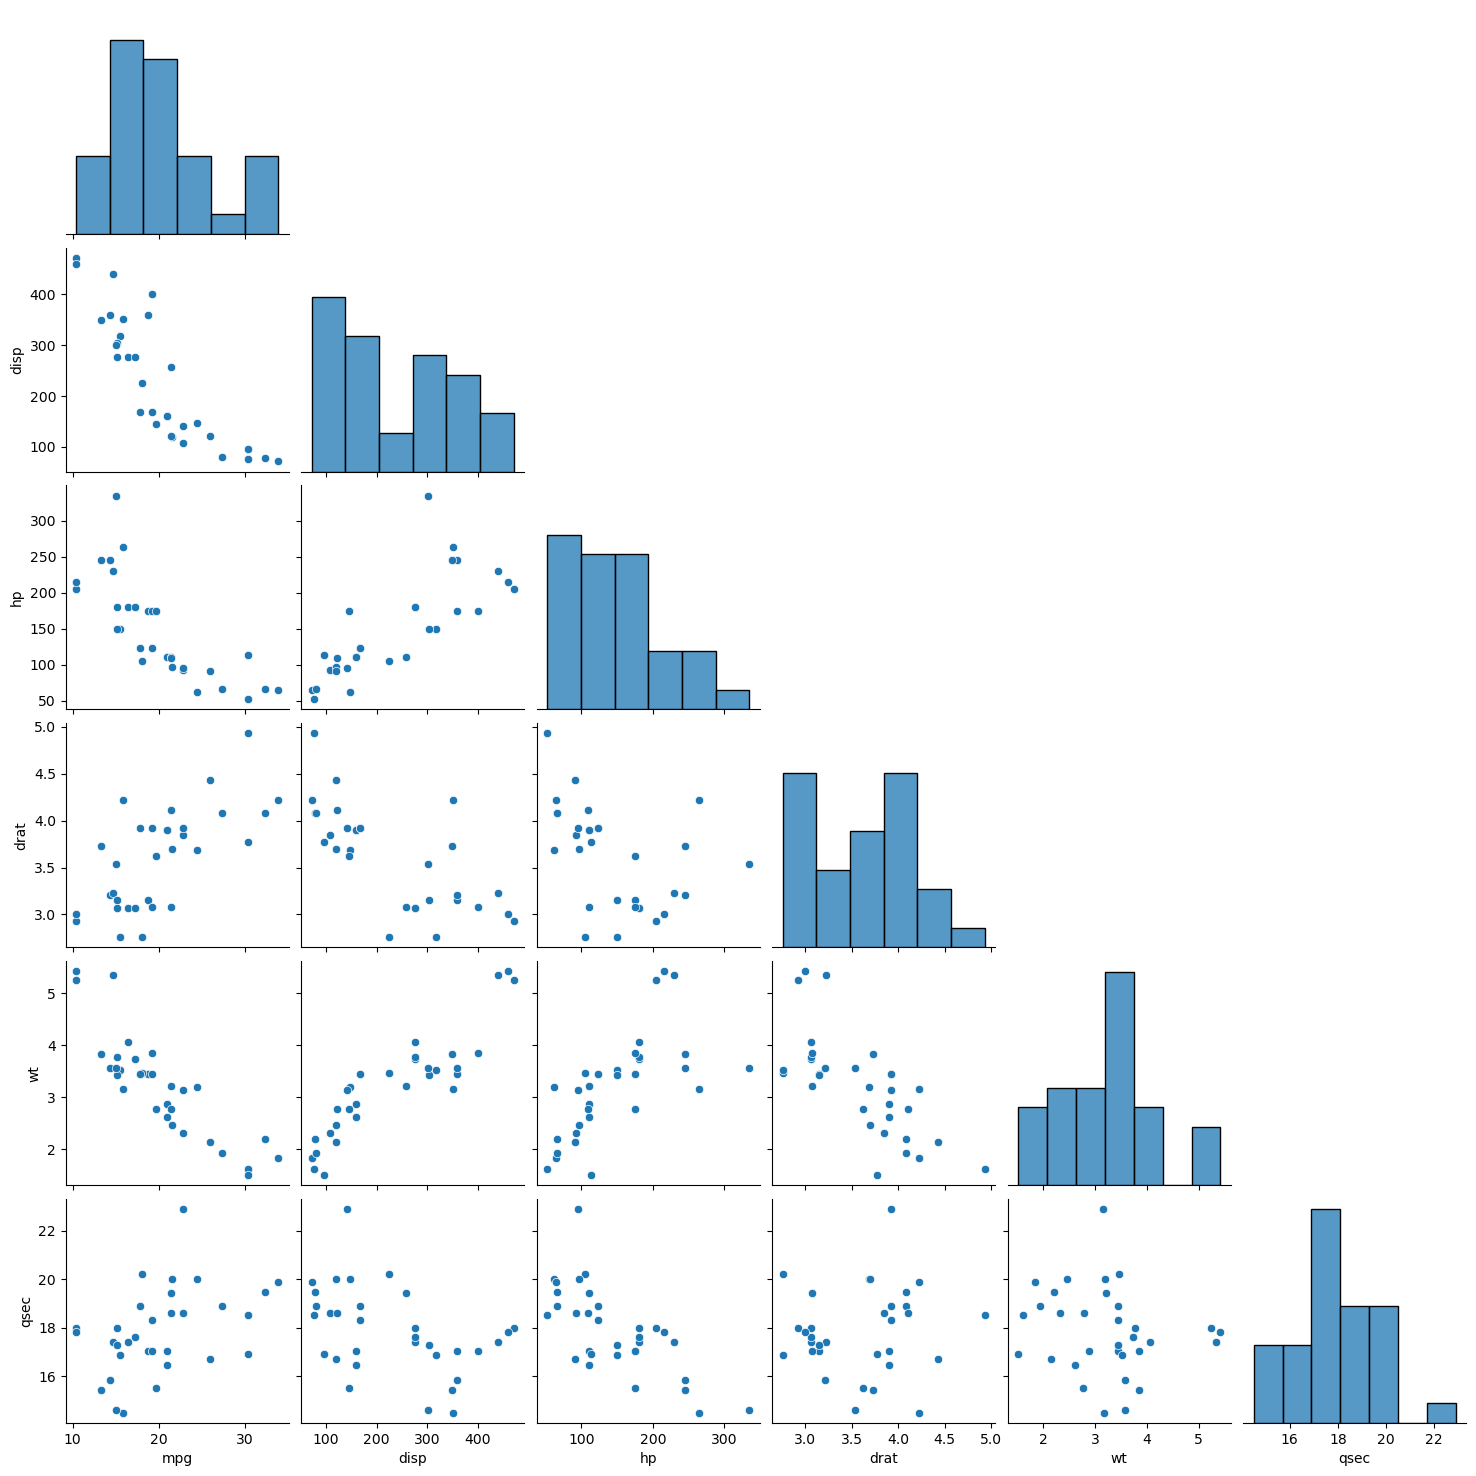

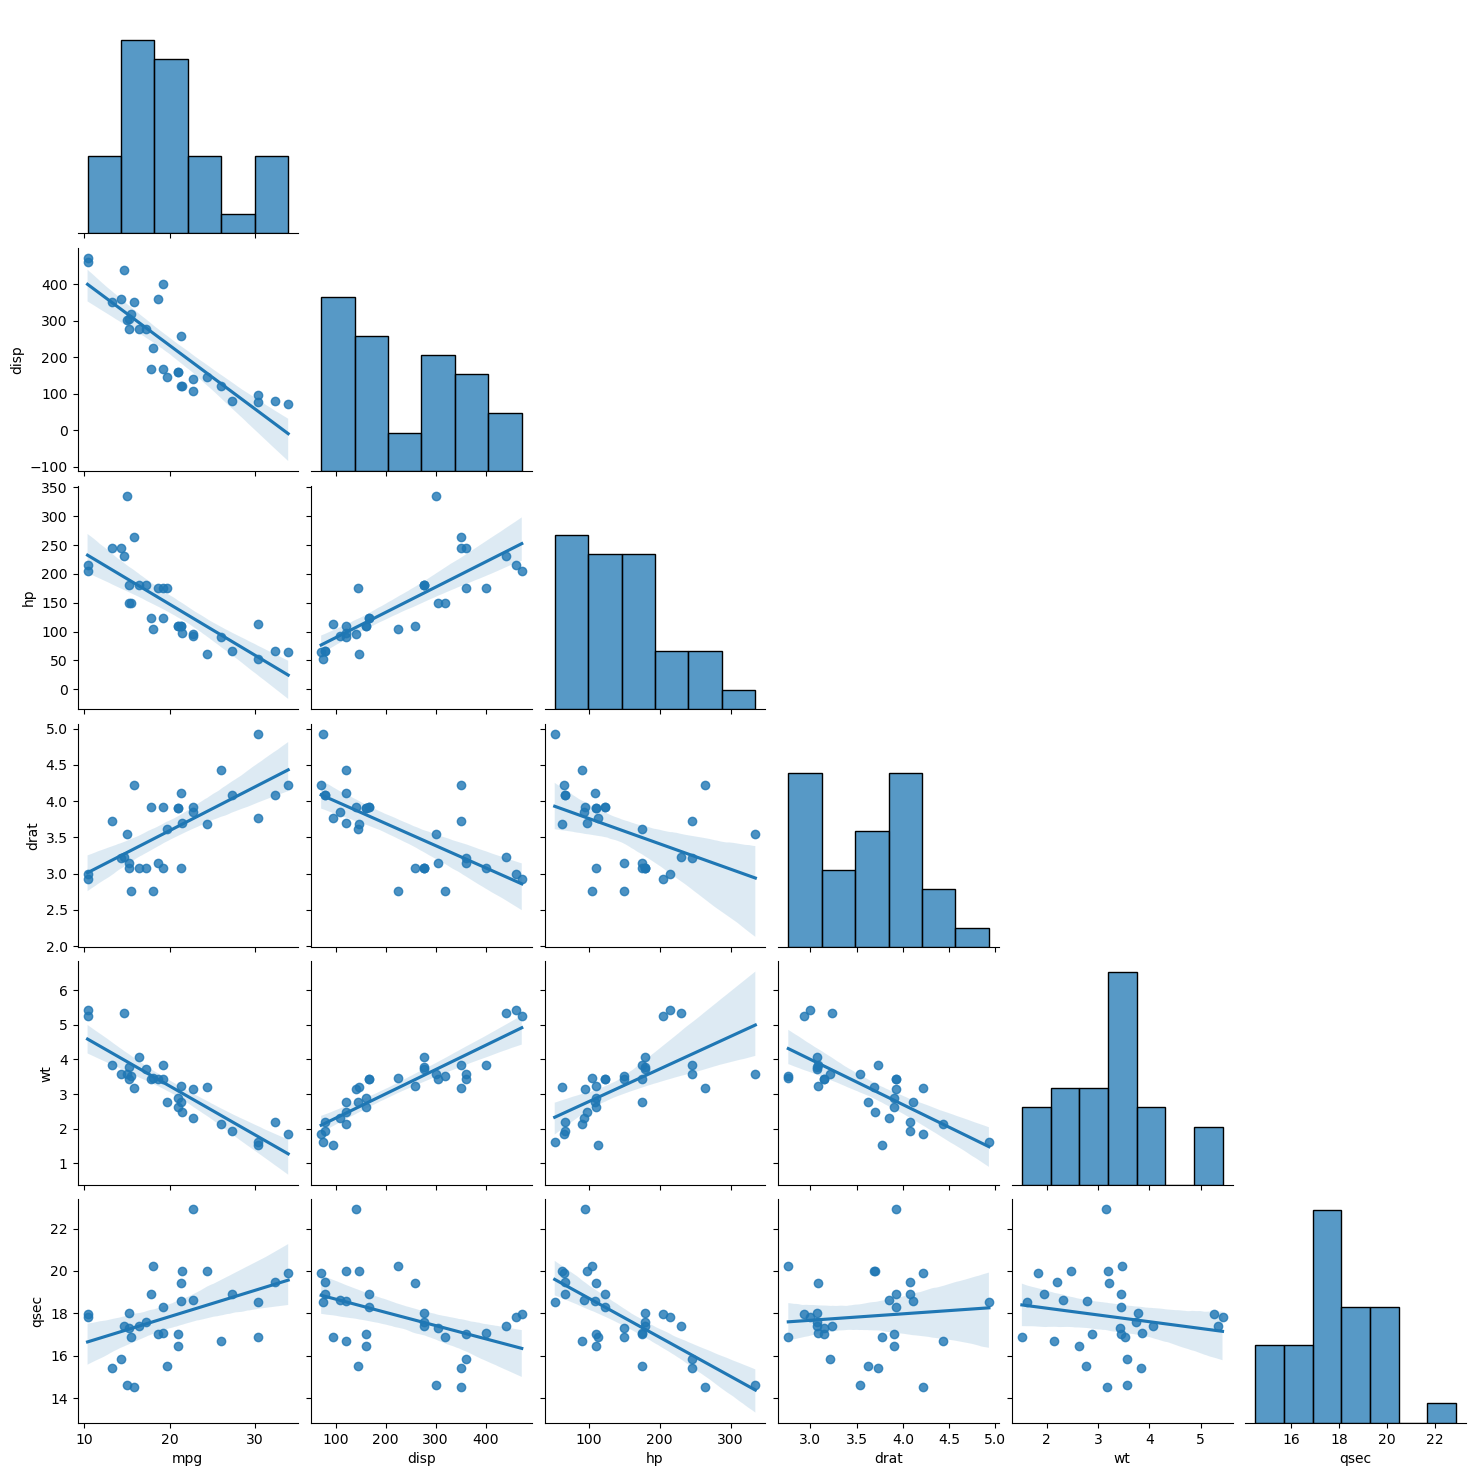

In [27]:
# Combinaciones de pares de variables para inspeccionar posibles correlaciones
# solo dispersión y histogramas/KDEs
g1= sns.pairplot(data, corner=True) 
#g1.savefig('pairplot_dispersión.png') # Guarda la figura sin línea de regresión

# con línea de regresión
g2= sns.pairplot(data, kind='reg', corner=True) 
#g2.savefig('pairplot_regresión.png') # Guarda la figura con línea de regresión
plt.show()

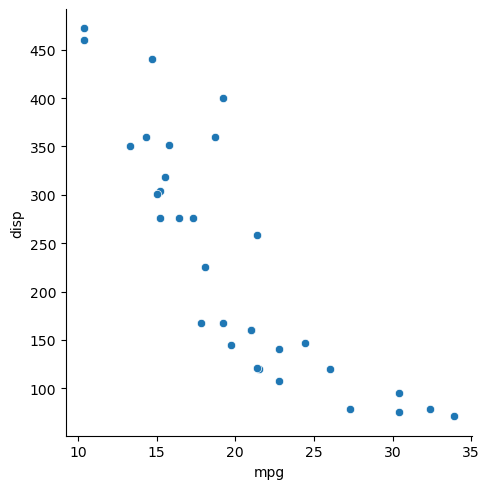

In [28]:
sns.relplot(data=data, x='mpg', y='disp', kind='scatter') 

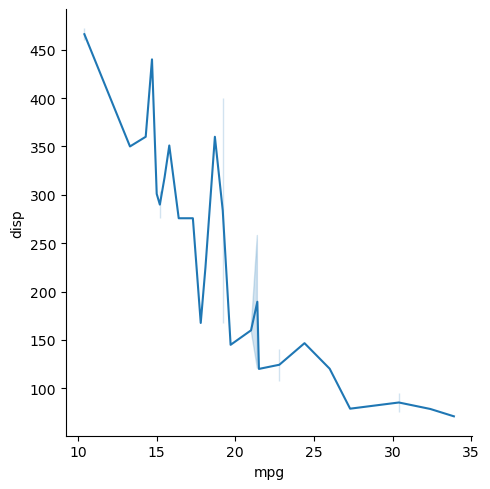

In [29]:
sns.relplot(data=data, x='mpg', y='disp', kind='line') 

In [30]:
# Calculamos la correlacion entre pares de variables. Si alguna correlación es buena, entonces podriamos construir un modelo
correlacion = data.corr()
correlacion

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


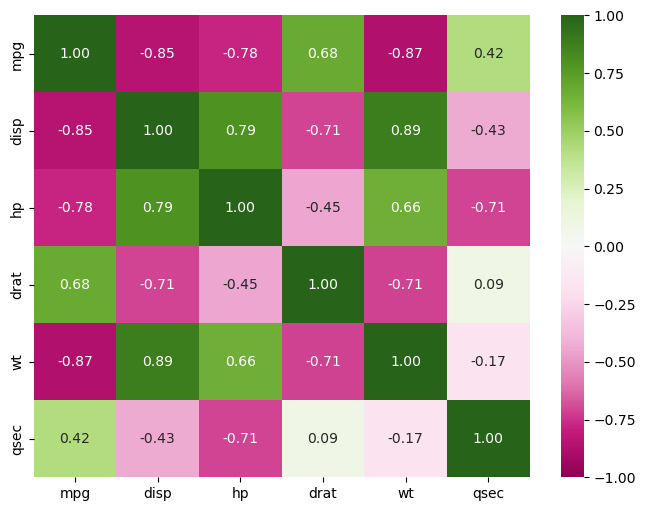

In [31]:
# Visualizacion alternativa de la correlacion como heatmap

# Crear una figura de tamaño 8x6 pulgadas
plt.figure(figsize=(8, 6))

# Dibujar el heatmap con anotaciones y formato de decimales
sns.heatmap(correlacion,           # matriz de correlación
            annot=True,            # mostrar los valores en cada celda
            vmin=-1, vmax=1,       # rango de valores de correlación
            fmt='.2f',             # formato numérico con 2 decimales
            cmap='PiYG')           # paleta de colores divergente

# Mostrar el gráfico
plt.show()


# Modelo de Regresion Lienal (statsmodel)

In [32]:
x = data['drat'] # drat = relación del eje trasero
y = data['wt']   # wt = peso del auto, en miles de libras

x1 = sm.add_constant(x) # Añade una columna de "1"s a 'x'. Esto es para calcular la intersección (constante) en la regresión.
olsmod = sm.OLS(y, x1).fit() # Ejecuta una Regresión de Mínimos Cuadrados Ordinarios (OLS) usando 'y' como variable dependiente y 'x1' como independiente, y ajusta el modelo.
print(olsmod.summary()) # Muestra un resumen estadístico completo de los resultados de la regresión.

# Notar que tanto wt como const(intercept) son significativos, pues su p<0.05
# Un p-value bajo sugiere que la relación observada no se debe al azar.
# No garantiza que el modelo sea perfecto, pero sí que las variables incluidas son relevantes.

                            OLS Regression Results                            
Dep. Variable:                     wt   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     30.92
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           4.78e-06
Time:                        13:34:18   Log-Likelihood:                -32.867
No. Observations:                  32   AIC:                             69.73
Df Residuals:                      30   BIC:                             72.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9063      0.852      9.277      0.0

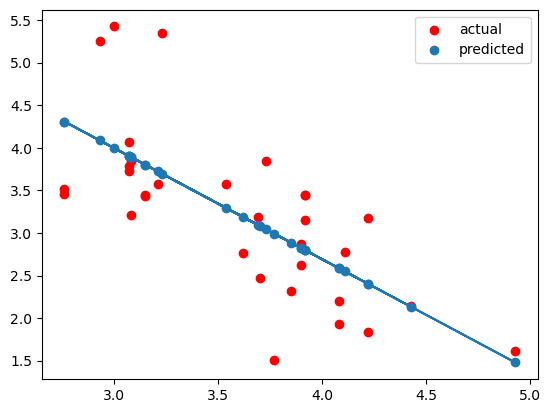

In [37]:
# Grafico para ver los valores reales y predicho por el modelo
def plot(x, y, y_pred):
    plt.scatter(x, y, color='red', label='actual')
    plt.scatter(x, y_pred, label='predicted')
    plt.plot(x, y_pred)

    plt.legend()
    plt.show()
y_pred = olsmod.predict(x1)
plot(x, y, y_pred)

El modelo captura la tendencia general (relación negativa), pero no predice con mucha precisión cada punto individual.
Hay bastante ruido o variabilidad no explicada en los datos.

In [40]:
# Calculamos los residuos: diferencia entre valores reales y predichos
residuals = y - y_pred

# Media y desviación estándar de los residuos (también accesibles vía olsmod.resid)
print('Media:', np.mean(residuals))       # Esperamos que sea ~0 si el modelo está bien ajustado
print('Desvío estándar:', np.std(residuals))  # Cuantifica la dispersión de los errores

# Comparación con los residuos del modelo statsmodels
np.mean(olsmod.resid), np.std(olsmod.resid)


Media: -9.71445146547012e-17
Desvío estándar: 0.6758017498627418


(-9.71445146547012e-17, 0.6758017498627418)

**Media:** ≈ 0  
**Desvío estándar:** 0.6758  

Los datos están centrados en cero con una dispersión moderada.


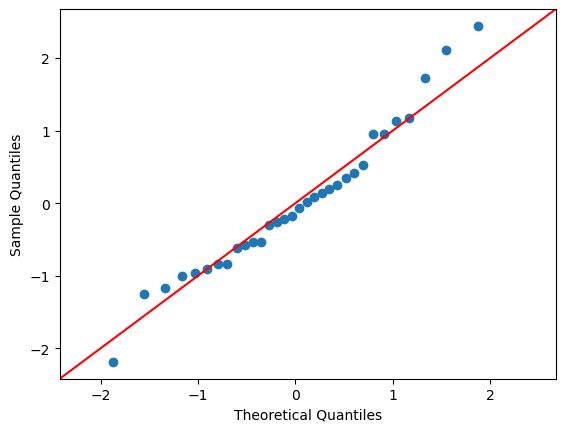

In [43]:
# test = np.random.normal(0,1,1000)
# Genera una muestra aleatoria de 1000 valores con distribución normal (media 0, desvío estándar 1).
# Comentada: se usa solo para probar el gráfico QQ con una distribución conocida.

# test = np.random.uniform(0,1,1000)
# Genera una muestra aleatoria uniforme entre 0 y 1. También es útil para comparar el gráfico QQ cuando los datos no son normales.

# sm.qqplot(test, line='45', fit=True)
# Muestra un gráfico QQ (quantile-quantile) para verificar visualmente si los datos se ajustan a una distribución normal.
# 'line="45"' dibuja una línea diagonal que representa la distribución normal ideal.
# 'fit=True' ajusta la media y la desviación estándar de los datos antes de comparar.

sm.qqplot(olsmod.resid, line='45', fit=True)
# Aplica el gráfico QQ sobre los residuos del modelo de regresión (`olsmod.resid`).
# Esto permite evaluar si los residuos siguen una distribución normal, como requiere uno de los supuestos del modelo lineal.

pylab.show()
# Muestra el gráfico en pantalla.


**Test de normalidad (Shapiro-Wilk)**  
- **H₀ (hipótesis nula):** los datos siguen una distribución normal.  
- **Hₐ (hipótesis alternativa):** los datos no siguen una distribución normal.  
- Si el **p-valor > 0.05**, se acepta H₀ (los residuos son normales).  
- Si el **p-valor ≤ 0.05**, se rechaza H₀ (los residuos no son normales).


In [44]:
# Aplicamos el Shapiro-Wilk test
from scipy.stats import shapiro
shapiro(residuals)

ShapiroResult(statistic=0.9698086853568425, pvalue=0.49413335657529006)

### Homocedasticidad

En un modelo de regresión lineal, se asume que los errores (residuos) tienen **varianza constante** a lo largo de todos los valores de la variable independiente.  
Este supuesto se llama **homocedasticidad**. Cuando no se cumple (es decir, cuando la varianza cambia), se dice que hay **heterocedasticidad**.

---

### Test de Breusch-Pagan

Este test evalúa si los residuos del modelo presentan homocedasticidad.

- **Hipótesis nula (H₀):** los residuos tienen varianza constante (**homocedasticidad**).  
- **Hipótesis alternativa (Hₐ):** la varianza de los residuos cambia con los valores de la variable independiente (**heterocedasticidad**).

---

### Interpretación del p-valor

- Si **p ≥ 0.05**, no se rechaza H₀ → **los residuos tienen varianza constante** (esto es deseable).  
- Si **p < 0.05**, se rechaza H₀ → **los residuos no tienen varianza constante**, lo cual **viola un supuesto del modelo lineal**.

---

> Una forma visual de revisar este supuesto es graficar los residuos contra la variable independiente y verificar que no haya un patrón de apertura o cierre en forma de cono.


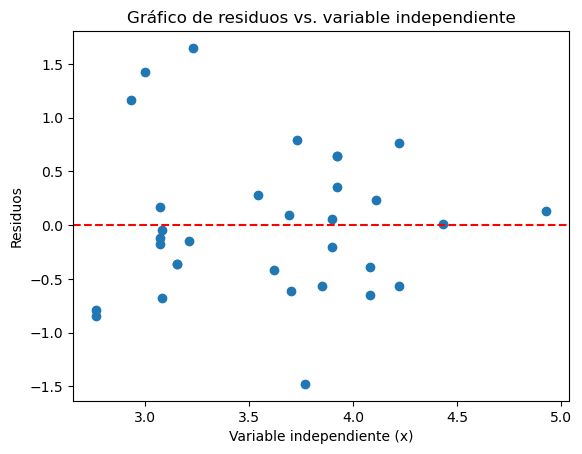

In [47]:
plt.scatter(x, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Variable independiente (x)')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. variable independiente')
plt.show()


# Test de homocedasticidad: Breusch-Pagan

In [46]:
# Aplicamos Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = smf.het_breuschpagan(olsmod.resid, olsmod.model.exog)
lzip(names, test)


[('Lagrange multiplier statistic', 2.0208568142758025),
 ('p-value', 0.1551515737059926),
 ('f-value', 2.0222627462263),
 ('f p-value', 0.16532230971570394)]

### Test de homocedasticidad: Breusch-Pagan

Se aplicó el test de Breusch-Pagan para evaluar si los residuos del modelo presentan homocedasticidad.

- **Estadístico LM:** 2.0209  
- **p-value:** 0.1551  
- **f-value:** 2.0223  
- **f p-value:** 0.1653  

---

### Interpretación

Dado que ambos p-valores son mayores que 0.05, **no se rechaza la hipótesis nula (H₀)**.  
Esto indica que **no hay evidencia de heterocedasticidad** en los residuos del modelo.  
Por lo tanto, se cumple el supuesto de **homocedasticidad** (varianza constante), lo cual es deseable en un modelo de regresión lineal.


# Test de Durbin-Watson

### Autocorrelación entre los residuos

La autocorrelación ocurre cuando los residuos no son independientes entre sí, es decir, el valor de un residuo **influye en los residuos cercanos** (por ejemplo, en series temporales o datos ordenados).

---

### Test de Durbin-Watson

Este test permite detectar autocorrelación en los residuos del modelo.

- **Hipótesis nula (H₀):** no hay autocorrelación entre los residuos.  
- **Hipótesis alternativa (Hₐ):** los residuos están autocorrelacionados.

---

### Interpretación del estadístico

El estadístico del test toma valores en el rango **[0, 4]**:

- **≈ 2** → sin autocorrelación (ideal)  
- **< 2** → posible autocorrelación positiva  
- **> 2** → posible autocorrelación negativa  
- **Valores cercanos a 0** → fuerte autocorrelación positiva  
- **Valores cercanos a 4** → fuerte autocorrelación negativa  

> En general, si el valor está entre **1.5 y 2.5**, se considera aceptable (sin evidencia clo Durbin-Watson en tu modelo?


In [49]:
# Aplicamos el Durbin-Watson test
durbin_watson(olsmod.resid)

1.4195099890309049

Dado que nuestro modelo parece significativo y valido, podemos utilizarlo para hacer predicciones. En particular, realizamos una predicción sobre valores arbitrarios de peso (*wt*)

In [52]:
x_new = pd.Series([2.5, 2.9])
print('Valores de drat:', list(x_new.values))
x1 = sm.add_constant(x_new)
pred = olsmod.predict(x1) # predicciones para los datos adicionales
print('Predicciones de wt (peso del auto en miles de libra):', list(pred))

Valores de drat: [2.5, 2.9]
Predicciones de wt (peso del auto en miles de libra): [4.64690453933665, 4.125400461151722]


A medida que la relación del eje trasero (drat) aumenta, el modelo predice que el peso (wt) del auto disminuye.
Esto refleja una relación negativa entre drat y wt en tu modelo de regresión lineal simple.

---


## **Modelo de regresion lineal (*sklearn*)**

In [54]:
# Muestra los valores de 'drat' (relación del eje trasero), que es la variable independiente.
x.values

array([3.9 , 3.9 , 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3.92,
       3.07, 3.07, 3.07, 2.93, 3.  , 3.23, 4.08, 4.93, 4.22, 3.7 , 2.76,
       3.15, 3.73, 3.08, 4.08, 4.43, 3.77, 4.22, 3.62, 3.54, 4.11])

In [55]:
# Convierte x (1D) en un array 2D con una sola columna, como requiere sklearn.
x_reshaped = x.values.reshape(-1, 1)


In [56]:
x_reshaped

array([[3.9 ],
       [3.9 ],
       [3.85],
       [3.08],
       [3.15],
       [2.76],
       [3.21],
       [3.69],
       [3.92],
       [3.92],
       [3.92],
       [3.07],
       [3.07],
       [3.07],
       [2.93],
       [3.  ],
       [3.23],
       [4.08],
       [4.93],
       [4.22],
       [3.7 ],
       [2.76],
       [3.15],
       [3.73],
       [3.08],
       [4.08],
       [4.43],
       [3.77],
       [4.22],
       [3.62],
       [3.54],
       [4.11]])

In [57]:
# Entrenamiento del modelo
lr_model = LinearRegression()                    # Crea un modelo de regresión lineal.
lr_model = lr_model.fit(x_reshaped, y)           # Ajusta el modelo: aprende a predecir 'wt' a partir de 'drat'.
print('coeficients:', lr_model.coef_)            # Muestra el coeficiente (pendiente).
print('intercept:', lr_model.intercept_)         # Muestra la ordenada al origen (intercepto).


coeficients: [-1.3037602]
intercept: 7.906305027992456


In [58]:
# Predicciones y metricas
y_pred = lr_model.predict(x_reshaped)            # Predice el peso (wt) para cada valor de 'drat' en el dataset.

r2 = r2_score(y, y_pred)                         # Calcula el R² (qué tan bien explica el modelo los datos).
print("R2=", r2)

mse = mean_squared_error(y, y_pred)              # Error cuadrático medio.
print("RMSE=", np.sqrt(mse))                     # Raíz del MSE: medida del error promedio en unidades originales (wt).


R2= 0.5075716750665695
RMSE= 0.6758017498627418


In [59]:
# Calcula el promedio de los residuos. Debería ser ≈ 0 si el modelo no tiene sesgo.
np.mean(y - y_pred)

-1.4432899320127035e-15

In [60]:
# Ajusta el R² penalizando si hay muchas variables (en este caso hay solo una).
def r2_adjusted_score(r2, x, y):
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)

print("R2adj=", r2_adjusted_score(r2, x_reshaped, y_pred))

R2adj= 0.4911573975687885


In [61]:
# Prediccion con nuevos valores
print('drat values:', list(x_new.values))  
# Muestra los nuevos valores de 'drat' que se usarán para predecir.

x_reshaped = x_new.values.reshape(-1, 1)  
# Convierte la serie en una matriz de una columna, como requiere sklearn.

pred = lr_model.predict(x_reshaped)  
# Usa el modelo entrenado para predecir el peso ('wt') a partir de los valores de 'drat'.

print('Predicciones de wt (peso en miles de libras):', list(pred))  
# Muestra los valores predichos de peso correspondientes a cada valor de 'drat'.


drat values: [2.5, 2.9]
Predicciones de wt (peso en miles de libras): [4.646904539336653, 4.125400461151725]
